In [1]:
import torch
import torch.optim
import numpy as np
import matplotlib.pyplot as plt
from CifarDataProcess import * 
from CifarClassifiers import *

In [2]:
# Load and scale the images, show a sample image
X_trn, X_tst, y_trn, y_tst, labels = load_cifar10()

X_trn = scale_data(X_trn)
X_tst = scale_data(X_tst)

LOADED b'training batch 1 of 5'
LOADED b'training batch 2 of 5'
LOADED b'training batch 3 of 5'
LOADED b'training batch 4 of 5'
LOADED b'training batch 5 of 5'


# Convolutional Neural Network Classification

In [3]:
torch.cuda.empty_cache()
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

X_trn_tsr = torch.FloatTensor(X_trn.reshape(-1, 3, 32, 32).astype('float32')).to(device)
y_trn_tsr = torch.LongTensor(y_trn).to(device)

model = torch.nn.Sequential(
        torch.nn.Conv2d(3, 64, kernel_size=5, padding=0),
        torch.nn.ReLU(),
        torch.nn.MaxPool2d(2, 2),
        torch.nn.Conv2d(64, 128, kernel_size=5, padding=0),
        torch.nn.ReLU(),
        torch.nn.MaxPool2d(2, 2),
        torch.nn.Flatten(),
        torch.nn.Linear(128*5*5, 1600),
        torch.nn.ReLU(),
        torch.nn.Linear(1600, 800),
        torch.nn.ReLU(),
        torch.nn.Linear(800, 10)).to(device)


In [50]:
model = train_cnn(trn_sets=(X_trn_tsr, y_trn_tsr), model=model, epochs=50, lr=0.05, batch_size=1000)

save_model(model)


Epoch   0: training loss = 1.8469
Epoch   5: training loss = 0.8757
Epoch  10: training loss = 0.6063
Epoch  15: training loss = 0.2838
Epoch  20: training loss = 0.1261
Epoch  25: training loss = 0.0523
Epoch  30: training loss = 0.0061
Epoch  35: training loss = 0.0061
Epoch  40: training loss = 0.0083
Epoch  45: training loss = 0.0090


In [3]:
model = torch.nn.Sequential(
        torch.nn.Conv2d(3, 64, kernel_size=5, padding=0),
        torch.nn.ReLU(),
        torch.nn.MaxPool2d(2, 2),
        torch.nn.Conv2d(64, 128, kernel_size=5, padding=0),
        torch.nn.ReLU(),
        torch.nn.MaxPool2d(2, 2),
        torch.nn.Flatten(),
        torch.nn.Linear(128*5*5, 1600),
        torch.nn.ReLU(),
        torch.nn.Linear(1600, 800),
        torch.nn.ReLU(),
        torch.nn.Linear(800, 10))
model = load_model(model, './out/cifar10.pth')

In [4]:

X_tst_tsr = torch.FloatTensor(X_tst.reshape(-1, 3, 32, 32).astype('float32'))
y_tst_tsr = torch.LongTensor(y_tst)

preds, acc = test_cnn((X_tst_tsr, y_tst_tsr), model)
print("Overall Accuracy: {:.2%}".format(acc))


Overall Accuracy: 75.02%


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[b'airplane' b'automobile' b'bird' b'cat' b'deer' b'dog' b'frog' b'horse'
 b'ship' b'truck']


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


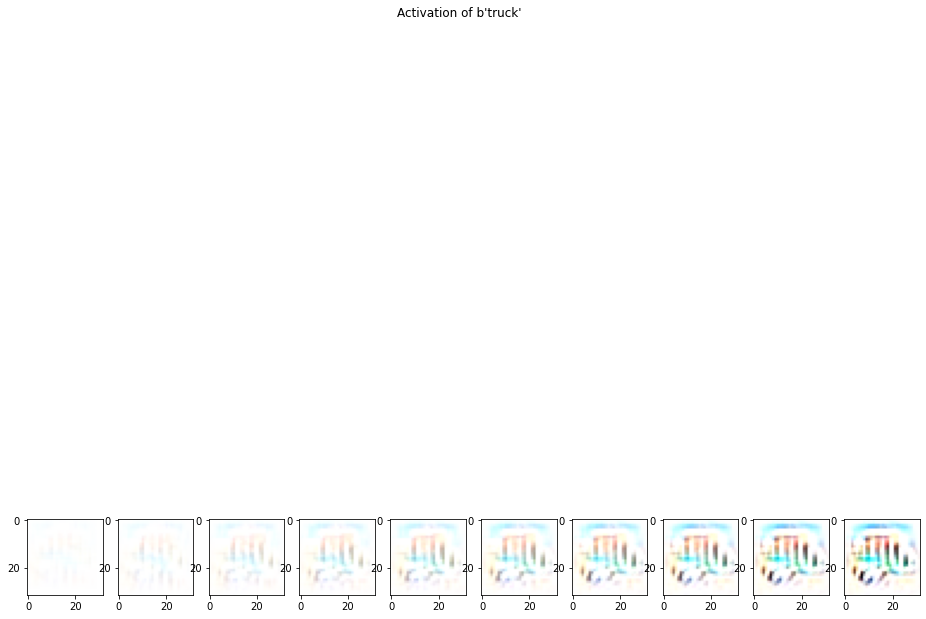

In [5]:
print(labels)
activation_maximization(b'truck', model, list(labels), step_slope=0.8, steps=10)

accuracy of airplane: 79.40%
accuracy of automobile: 84.90%
accuracy of bird: 64.50%
accuracy of cat: 58.30%
accuracy of deer: 68.80%
accuracy of dog: 65.70%
accuracy of frog: 84.30%
accuracy of horse: 76.70%
accuracy of ship: 84.80%
accuracy of truck: 82.80%


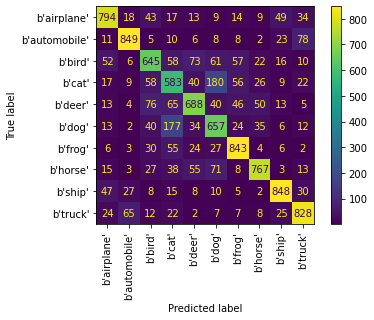

In [6]:
plot_confusion_matrix(preds, y_tst, labels)


# Cifar10 on DecisionTreeClassifier

LOADED b'training batch 1 of 5'
LOADED b'training batch 2 of 5'
LOADED b'training batch 3 of 5'
LOADED b'training batch 4 of 5'
LOADED b'training batch 5 of 5'
Fitting 3 folds for each of 5 candidates, totalling 15 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  15 out of  15 | elapsed: 24.5min finished


 Best estimatorDecisionTreeClassifier(max_depth=10, random_state=0)
Train acc: 0.42642
Test acc: 0.3055


GridSearchCV(cv=3, estimator=DecisionTreeClassifier(random_state=0),
             param_grid={'max_depth': [5, 10, 15, 50, 100]},
             return_train_score=True, verbose=1)

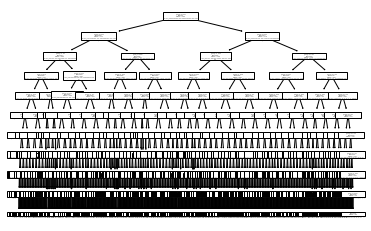

In [6]:
X_trn, X_tst, y_trn, y_tst, labels = load_cifar10()

X_trn = scale_data(X_trn)
X_tst = scale_data(X_tst)

# TEMP: Will use other pipline function for evaluation
max_depths = [5, 10, 15, 50, 100]
param_grid = {
    'max_depth': max_depths
}

evaluate_decision_tree(trn_sets=(X_trn, y_trn), tst_sets=(X_tst, y_tst), param_grid=param_grid, random_state=0)